In [1]:
import numpy as np  
import datetime

# matplotlib
# ライブラリーのインポート
import matplotlib.pyplot as plt
# インライン表示
%matplotlib inline

# 日本語フォント
import pylab
from matplotlib.font_manager import FontProperties
# 日本語フォント
fp = FontProperties(fname='C:\WINDOWS\Fonts\msgothic.ttc', size = 12)

# ipynbのインポート
import nbimporter
from common_data import get_calendar
from common_data import get_calendar_rev

Importing Jupyter notebook from common_data.ipynb


# 家電機器

## 16.　浴室暖房・乾燥機（ver自立P4）

### 16.1　定義

浴室暖房・乾燥機の動作状態および機能は、以下を想定する。

* 稼働－換気
* 稼働－暖房
* 待機

換気機能は、居住者の使用行動により使用の有無が決定される。

想定する動作状態および機能に対応する添え字は、以下のとおりである。

|機器の動作状態 |機器の機能 |添え字   |備考  　　　|  
|:-------------:|:---------:|:-------:|:----------:|    
|稼働           |換気       |opg,vent |-     　　　|  
|稼働           |暖房       |opg,heat |-     　　　|  
|待機           |-          |sby      |-     　　　| 

### 16.2　消費電力量

日付$d$の時刻$t$における浴室暖房・乾燥機の消費電力量$E_{E,BathroomHVA,d,t}$は、式(1)により表される。

$$ 
\begin{equation*}
    E_{E,BathroomHVA,d,t} = E_{E,opg,d,t} + E_{E,sby,d,t} 
\end{equation*}
$$


<div style="text-align: right;"> (1) </div>

ここで、  

$E_{E,BathroomHVA,d,t}$：日付$d$の時刻$t$における浴室暖房・乾燥機の単位時間当たりの消費電力量[Wh]  
$E_{E,opg,d,t}$：日付$d$の時刻$t$における稼働時の単位時間当たりの消費電力量[Wh]  
$E_{E,sby,d,t}$：日付$d$の時刻$t$における待機時の単位時間当たりの消費電力量[Wh]  

である。

In [2]:
def EE_app (EE_opg, EE_sby):
    '''消費電力量[Wh]を計算する'''
    # EE_opg：稼働時の消費電力量[Wh]
    # EE_sby：待機時の消費電力量[Wh]
    
    return EE_opg + EE_sby

日付$d$の時刻$t$における稼働時の消費電力量$E_{E,opg,d,t}$および待機時の消費電力量$E_{E,sby,d,t}$は、式(2)および式(3)により計算される。

<p style="text-indent:2em">稼働時の消費電力：</p>  
$$ 
\begin{equation*}
    E_{E,opg,d,t} = E_{E,opg,vent,d,t} + E_{E,opg,heat,d,t}
\end{equation*}
$$


<div style="text-align: right;"> (3-1) </div>

<p style="text-indent:4em">換気が機能する場合：</p>   
$$ 
\begin{equation*}
    E_{E,opg,vent,d,t} = P_{opg,vent} \times dt_{opg,vent,d,t} \div 3600
\end{equation*}
$$


<div style="text-align: right;"> (3-2) </div>

<p style="text-indent:4em">暖房が機能する場合：</p>   
$$ 
\begin{equation*}
    E_{E,opg,heat,d,t} = P_{opg,heat} \times dt_{opg,heat,d,t} \div 3600
\end{equation*}
$$


<div style="text-align: right;"> (3-3) </div>

<p style="text-indent:2em">待機時の消費電力：</p>    
$$ 
\begin{equation*}
    E_{E,sby,d,t} = P_{sby} \times dt_{sby,d,t} \div 3600
\end{equation*}
$$


<div style="text-align: right;"> (4) </div>

ただし、式(4)を満たす。
$$ 
\begin{equation*}
     dt_{opg,vent,d,t} + dt_{opg,heat,d,t} + dt_{sby,d,t} = dt_{calc}
\end{equation*}
$$
<div style="text-align: right;"> (5) </div>

ここで、  

$dt_{calc}$：単位時間[s]   
$dt_{opg,vent,d,t}$：日付$d$の時刻$t$において換気が機能することによる稼働時間の合計[s]  
$dt_{opg,heat,d,t}$：日付$d$の時刻$t$において暖房が機能することによる稼働時間の合計[s]  
$dt_{sby,d,t}$：日付$d$の時刻$t$における待機時間の合計[s]   
$E_{E,opg,vent,d,t}$：日付$d$の時刻$t$において換気が機能することによる稼働時の単位時間当たりの消費電力量[Wh]   
$E_{E,opg,heat,d,t}$：日付$d$の時刻$t$において暖房が機能することによる稼働時の単位時間当たりの消費電力量[Wh]   
$E_{E,sby,d,t}$：日付$d$の時刻$t$における待機時の単位時間当たりの消費電力量[Wh]   
$P_{opg,vent}$：換気が機能することによる稼働時の消費電力[W]  
$P_{opg,heat}$：暖房が機能することによる稼働時の消費電力[W]  
$P_{sby}$：待機時の消費電力[W]   

である。

In [3]:
def EE_opg (EE_opg_vent,EE_opg_heat):
    '''稼働時の消費電力量[Wh]を計算する'''
    # EE_opg_vent：換気が機能することによる稼働時の単位時間当たりの消費電力量[Wh]
    # EE_opg_heat：暖房が機能することによる稼働時の単位時間当たりの消費電力量[Wh]  
  
    return EE_opg_vent + EE_opg_heat

In [4]:
def EE_opg_vent (P_opg_vent, dt_opg_vent):
    '''換気が機能することによる稼働時の消費電力量[Wh]を計算する'''
    # P_opg_vent：換気が機能することによる稼働時の消費電力[W]    
    # dt_opg_vent：換気が機能することによる稼働時間の合計[s]
  
    return P_opg_vent * dt_opg_vent / 3600

In [5]:
def EE_opg_heat (P_opg_heat, dt_opg_heat):
    '''暖房が機能することによる稼働時の消費電力量[Wh]を計算する'''
    # P_opg_heat：暖房が機能することによる稼働時の消費電力[W]    
    # dt_opg_heat：暖房が機能することによる稼働時間の合計[s]
  
    return P_opg_heat * dt_opg_heat / 3600

In [6]:
def EE_sby (P_sby, dt_sby):
    '''待機時の消費電力量[Wh]を計算する'''
    # P_sby：待機時の消費電力[W]
    # dt_sby：待機時間の合計[s]
 
    return P_sby * dt_sby / 3600

In [7]:
def check_duration (dt):
    '''合計が単位時間を超過しないか否かを確認する'''
    # dt：稼働時間の合計[s](list型)
    # dt_calc：単位時間[s]
    
    dt_calc = 3600.
    
    # 継続時間を積算する
    dt_sum = sum(dt)
    
    # エラーチェック
    if dt_calc != dt_sum:
        # 単位時間と異なる => エラー
        try:
            raise Exception('機器動作スケジュールに不正があります。')
        except Exception:
            raise
    else:
        pass

### 16.3　稼働時の消費電力

日付$d$の時刻$t$における稼働時の消費電力は、式(5)により計算される。

<p style="text-indent:2em">換気が機能することによる稼働時の消費電力：</p>     
$$ 
\begin{equation*}
    P_{opg,vent} = 0.881 \times P_{rtd,vent}
\end{equation*}
$$

<div style="text-align: right;"> (6-1) </div>

<p style="text-indent:2em">暖房が機能することによる稼働時の消費電力：</p>
<p style="text-indent:4em">暖房機能を使用する場合：</p>
$$ 
\begin{equation*}
    P_{opg,heat} = 0.834 \times P_{rtd,heat}
\end{equation*}
$$

<div style="text-align: right;"> (6-2) </div>

<p style="text-indent:4em">暖房機能を使用しない場合：</p>
$$ 
\begin{equation*}
    P_{opg,heat} = 0
\end{equation*}
$$

<div style="text-align: right;"> (6-3) </div>

ここで、   

$P_{opg,vent}$：換気が機能することによる稼働時の消費電力[W]  
$P_{opg,heat}$：換気が機能することによる稼働時の消費電力[W]  
$P_{rtd,vent}$：換気モードの定格消費電力[W]  
$P_{rtd,heat}$：予備暖房モードの定格消費電力[W]   

である。

In [8]:
def P_opg_vent (Prtd_vent):
    '''換気が機能することによる稼働時の消費電力[W]を計算する'''  
    # Prtd_vent：換気モードの定格消費電力[W]  
    
    return 0.881 * Prtd_vent

In [9]:
def P_opg_heat (Prtd_heat, heating_use):
    '''暖房が機能することによる稼働時の消費電力[W]を計算する''' 
    # Prtd_heat：予備暖房モードの定格消費電力[W]
    # heating_use：暖房機能を使用するか否か[True：使用する、False：使用しない](Boolean型)
    
    if heating_use is True:
        return 0.834 * Prtd_heat
    else:
        return 0

### 16.4　待機時の消費電力

日付$d$の時刻$t$における待機時の消費電力は、式(6)により計算される。

<p style="text-indent:2em">待機時の消費電力：</p>  
$$ 
\begin{equation*}
    P_{sby} = P_{rtd,sby} 
\end{equation*}
$$

<div style="text-align: right;"> (7) </div>

ここで、   

$P_{sby}$：待機時の消費電力[W]  
$P_{rtd,sby}$：待機定格消費電力[W]  

である。

In [10]:
def P_sby (Prtd_sby):
    '''待機時の消費電力[W]を計算する''' 
    # Prtd_sby：待機定格消費電力[W]    
    
    return Prtd_sby

### 16.5　標準条件

#### 16.5.1　機器仕様

4人世帯の標準的な機器仕様については、デフォルト設定がない。

ここでは、メーカHPから得られた情報に基づき、参考までに下表のように設定する。

<table style="border-collapse:collapse;">
    <caption>表 機器仕様（参考）</caption>
    <thead style="background-color:lightgrey" >
        <tr>
            <th style="text-align:center; border:1px solid black;" >番号</th>
            <th style="text-align:center; border:1px solid black;" >換気モードの定格消費電力[W]</th>
            <th style="text-align:center; border:1px solid black;" >予備暖房モードの定格消費電力[W]</th>
            <th style="text-align:center; border:1px solid black;" >待機定格消費電力[W]</th>
            <th style="text-align:center; border:1px solid black;" >備考</th>
        </tr>
    </thead>
    <tbody>    
        <tr>
            <td style="border:1px solid black; text-align:center;">(sample)</td>
            <td style="border:1px solid black; text-align:center;">21</td>
            <td style="border:1px solid black; text-align:center;">2200</td>
            <td style="border:1px solid black; text-align:center;">0.5</td>
            <td style="border:1px solid black; text-align:center;">※デフォルト設定ではない</td>
        </tr>
    </tbody> 
</table>

In [11]:
Spec  = {
    'BathroomHVA_sample' : {
        'Prtd_vent': 21,
        'Prtd_heat': 2200,
        'Prtd_sby' : 0.5
    }
}

#### 16.5.2　機器動作スケジュール

4人世帯の標準的なスケジュールについては、デフォルト設定がない。

ここでは、換気については、換気設備の局所換気として計算されるため、使用時間はゼロとする。暖房については、JIS C 9920-2：2009（浴室用電気乾燥機の設計標準使用期間を設定するための標準使用条件）の解説表1および入浴に関するスケジュールから、下表のように設定する。

<table style="border-collapse:collapse;">
    <caption>表 4人世帯のスケジュール（参考）</caption>
    <thead style="background-color:lightgrey" >
        <tr>
            <th style="text-align:center; border:1px solid black;" >番号</th>
            <th style="text-align:center; border:1px solid black;" >スケジュール名称</th>
            <th style="text-align:center; border:1px solid black;" >備考</th>
        </tr>
    </thead>
    <tbody>    
        <tr>
            <td style="border:1px solid black; text-align:center;">-</td>
            <td style="border:1px solid black; text-align:center;">sample</td>
            <td style="border:1px solid black; text-align:center;">※デフォルト設定ではない</td>
        </tr>
    </tbody> 
</table>

<table style="border-collapse:collapse;">
    <caption>表 平日（参考）</caption>
    <thead style="background-color:lightgrey" >
        <tr>
            <th style="text-align:center; border:1px solid black;" >時刻</th>
            <th style="text-align:center; border:1px solid black;" >0</th>
            <th style="text-align:center; border:1px solid black;" >1</th>
            <th style="text-align:center; border:1px solid black;" >2</th>
            <th style="text-align:center; border:1px solid black;" >3</th>
            <th style="text-align:center; border:1px solid black;" >4</th>
            <th style="text-align:center; border:1px solid black;" >5</th>
            <th style="text-align:center; border:1px solid black;" >6</th>
            <th style="text-align:center; border:1px solid black;" >7</th>
            <th style="text-align:center; border:1px solid black;" >8</th>
            <th style="text-align:center; border:1px solid black;" >9</th>
            <th style="text-align:center; border:1px solid black;" >10</th>
            <th style="text-align:center; border:1px solid black;" >11</th>
            <th style="text-align:center; border:1px solid black;" >12</th>
            <th style="text-align:center; border:1px solid black;" >13</th>
            <th style="text-align:center; border:1px solid black;" >14</th>
            <th style="text-align:center; border:1px solid black;" >15</th>
            <th style="text-align:center; border:1px solid black;" >16</th>
            <th style="text-align:center; border:1px solid black;" >17</th>
            <th style="text-align:center; border:1px solid black;" >18</th>
            <th style="text-align:center; border:1px solid black;" >19</th>
            <th style="text-align:center; border:1px solid black;" >20</th>
            <th style="text-align:center; border:1px solid black;" >21</th>
            <th style="text-align:center; border:1px solid black;" >22</th>
            <th style="text-align:center; border:1px solid black;" >23</th>
        </tr>
    </thead>
    <tbody>    
        <tr>
            <td style="border:1px solid black; text-align:center;">稼働時間 &#95; 換気[&#42; 60 s]</td>
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  0 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  1 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  2 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  3 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  4 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  5 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  6 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  7 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  8 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  9 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 10 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 11 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 12 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 13 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 14 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 15 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 16 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 17 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 18 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 19 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 20 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 21 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 22 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 23 -->
        </tr>
        <tr>
            <td style="border:1px solid black; text-align:center;">稼働時間 &#95; 暖房[&#42; 60 s]</td>
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  0 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  1 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  2 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  3 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  4 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  5 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  6 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  7 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  8 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  9 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 10 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 11 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 12 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 13 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 14 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 15 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 16 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 17 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 18 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 19 -->
            <td style="border:1px solid black; text-align:center;">30</td>　<!-- 20 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 21 -->
            <td style="border:1px solid black; text-align:center;">30</td>　<!-- 22 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 23 -->
        </tr>
        <tr>
            <td style="border:1px solid black; text-align:center;">待機時間[&#42; 60 s]</td>
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  0 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  1 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  2 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  3 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  4 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  5 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  6 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  7 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  8 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  9 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 10 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 11 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 12 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 13 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 14 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 15 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 16 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 17 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 18 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 19 -->
            <td style="border:1px solid black; text-align:center;">30</td>　<!-- 20 -->
            <td style="border:1px solid black; text-align:center;"> 0</td>　<!-- 21 -->
            <td style="border:1px solid black; text-align:center;">30</td>　<!-- 22 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 23 -->
        </tr>
    </tbody> 
</table>

<table style="border-collapse:collapse;">
    <caption>表 休日在宅（参考）</caption>
    <thead style="background-color:lightgrey" >
        <tr>
            <th style="text-align:center; border:1px solid black;" >時刻</th>
            <th style="text-align:center; border:1px solid black;" >0</th>
            <th style="text-align:center; border:1px solid black;" >1</th>
            <th style="text-align:center; border:1px solid black;" >2</th>
            <th style="text-align:center; border:1px solid black;" >3</th>
            <th style="text-align:center; border:1px solid black;" >4</th>
            <th style="text-align:center; border:1px solid black;" >5</th>
            <th style="text-align:center; border:1px solid black;" >6</th>
            <th style="text-align:center; border:1px solid black;" >7</th>
            <th style="text-align:center; border:1px solid black;" >8</th>
            <th style="text-align:center; border:1px solid black;" >9</th>
            <th style="text-align:center; border:1px solid black;" >10</th>
            <th style="text-align:center; border:1px solid black;" >11</th>
            <th style="text-align:center; border:1px solid black;" >12</th>
            <th style="text-align:center; border:1px solid black;" >13</th>
            <th style="text-align:center; border:1px solid black;" >14</th>
            <th style="text-align:center; border:1px solid black;" >15</th>
            <th style="text-align:center; border:1px solid black;" >16</th>
            <th style="text-align:center; border:1px solid black;" >17</th>
            <th style="text-align:center; border:1px solid black;" >18</th>
            <th style="text-align:center; border:1px solid black;" >19</th>
            <th style="text-align:center; border:1px solid black;" >20</th>
            <th style="text-align:center; border:1px solid black;" >21</th>
            <th style="text-align:center; border:1px solid black;" >22</th>
            <th style="text-align:center; border:1px solid black;" >23</th>
        </tr>
    </thead>
    <tbody>    
        <tr>
            <td style="border:1px solid black; text-align:center;">稼働時間 &#95; 換気[&#42; 60 s]</td>
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  0 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  1 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  2 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  3 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  4 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  5 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  6 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  7 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  8 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  9 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 10 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 11 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 12 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 13 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 14 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 15 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 16 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 17 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 18 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 19 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 20 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 21 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 22 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 23 -->
        </tr>
        <tr>
            <td style="border:1px solid black; text-align:center;">稼働時間 &#95; 暖房[&#42; 60 s]</td>
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  0 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  1 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  2 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  3 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  4 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  5 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  6 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  7 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  8 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  9 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 10 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 11 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 12 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 13 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 14 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 15 -->
            <td style="border:1px solid black; text-align:center;">15</td>　<!-- 16 -->
            <td style="border:1px solid black; text-align:center;">15</td>　<!-- 17 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 18 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 19 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 20 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 21 -->
            <td style="border:1px solid black; text-align:center;">30</td>　<!-- 22 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 23 -->
        </tr>
        <tr>
            <td style="border:1px solid black; text-align:center;">待機時間[&#42; 60 s]</td>
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  0 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  1 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  2 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  3 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  4 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  5 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  6 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  7 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  8 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  9 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 10 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 11 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 12 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 13 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 14 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 15 -->
            <td style="border:1px solid black; text-align:center;">45</td>　<!-- 16 -->
            <td style="border:1px solid black; text-align:center;">45</td>　<!-- 17 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 18 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 19 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 20 -->
            <td style="border:1px solid black; text-align:center;"> 0</td>　<!-- 21 -->
            <td style="border:1px solid black; text-align:center;">30</td>　<!-- 22 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 23 -->
        </tr>
    </tbody> 
</table>

<table style="border-collapse:collapse;">
    <caption>表 休日外出（参考）</caption>
    <thead style="background-color:lightgrey" >
        <tr>
            <th style="text-align:center; border:1px solid black;" >時刻</th>
            <th style="text-align:center; border:1px solid black;" >0</th>
            <th style="text-align:center; border:1px solid black;" >1</th>
            <th style="text-align:center; border:1px solid black;" >2</th>
            <th style="text-align:center; border:1px solid black;" >3</th>
            <th style="text-align:center; border:1px solid black;" >4</th>
            <th style="text-align:center; border:1px solid black;" >5</th>
            <th style="text-align:center; border:1px solid black;" >6</th>
            <th style="text-align:center; border:1px solid black;" >7</th>
            <th style="text-align:center; border:1px solid black;" >8</th>
            <th style="text-align:center; border:1px solid black;" >9</th>
            <th style="text-align:center; border:1px solid black;" >10</th>
            <th style="text-align:center; border:1px solid black;" >11</th>
            <th style="text-align:center; border:1px solid black;" >12</th>
            <th style="text-align:center; border:1px solid black;" >13</th>
            <th style="text-align:center; border:1px solid black;" >14</th>
            <th style="text-align:center; border:1px solid black;" >15</th>
            <th style="text-align:center; border:1px solid black;" >16</th>
            <th style="text-align:center; border:1px solid black;" >17</th>
            <th style="text-align:center; border:1px solid black;" >18</th>
            <th style="text-align:center; border:1px solid black;" >19</th>
            <th style="text-align:center; border:1px solid black;" >20</th>
            <th style="text-align:center; border:1px solid black;" >21</th>
            <th style="text-align:center; border:1px solid black;" >22</th>
            <th style="text-align:center; border:1px solid black;" >23</th>
        </tr>
    </thead>
    <tbody>    
        <tr>
            <td style="border:1px solid black; text-align:center;">稼働時間 &#95; 換気[&#42; 60 s]</td>
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  0 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  1 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  2 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  3 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  4 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  5 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  6 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  7 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  8 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  9 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 10 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 11 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 12 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 13 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 14 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 15 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 16 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 17 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 18 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 19 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 20 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 21 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 22 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 23 -->
        </tr>
        <tr>
            <td style="border:1px solid black; text-align:center;">稼働時間 &#95; 暖房[&#42; 60 s]</td>
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  0 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  1 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  2 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  3 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  4 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  5 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  6 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  7 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  8 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!--  9 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 10 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 11 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 12 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 13 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 14 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 15 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 16 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 17 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 18 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 19 -->
            <td style="border:1px solid black; text-align:center;">30</td>　<!-- 20 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 21 -->
            <td style="border:1px solid black; text-align:center;">30</td>　<!-- 22 -->
            <td style="border:1px solid black; text-align:center;">0</td>　<!-- 23 -->
        </tr>
        <tr>
            <td style="border:1px solid black; text-align:center;">待機時間[&#42; 60 s]</td>
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  0 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  1 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  2 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  3 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  4 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  5 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  6 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  7 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  8 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!--  9 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 10 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 11 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 12 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 13 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 14 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 15 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 16 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 17 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 18 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 19 -->
            <td style="border:1px solid black; text-align:center;">30</td>　<!-- 20 -->
            <td style="border:1px solid black; text-align:center;"> 0</td>　<!-- 21 -->
            <td style="border:1px solid black; text-align:center;">30</td>　<!-- 22 -->
            <td style="border:1px solid black; text-align:center;">60</td>　<!-- 23 -->
        </tr>
    </tbody> 
</table>

In [12]:
Schedule= {
    '4p_sample' : {
        'Weekdays' : {
            'opg_vent' : [0]*24,
            'opg_heat' : [0]   *20 + [1800]*1 + [3600]*1 + [1800]*1 + [0]   *1,
            'sby'      : [3600]*20 + [1800]*1 + [0]   *1 + [1800]*1 + [3600]*1
        },
        'Holidays_st' : {
           'opg_vent'  : [0]*24,
            'opg_heat' : [0]   *16 + [900] *2 + [0]   *3+ [3600]*1 + [1800]*1 + [0]   *1,
            'sby'      : [3600]*16 + [2700]*2 + [3600]*3+ [0]   *1 + [1800]*1 + [3600]*1
        },
        'Holidays_go' : {
            'opg_vent' : [0]*24,
            'opg_heat' : [0]   *20 + [1800]*1 + [3600]*1 + [1800]*1 + [0]   *1,
            'sby'      : [3600]*20 + [1800]*1 + [0]   *1 + [1800]*1 + [3600]*1
        }
    }
}

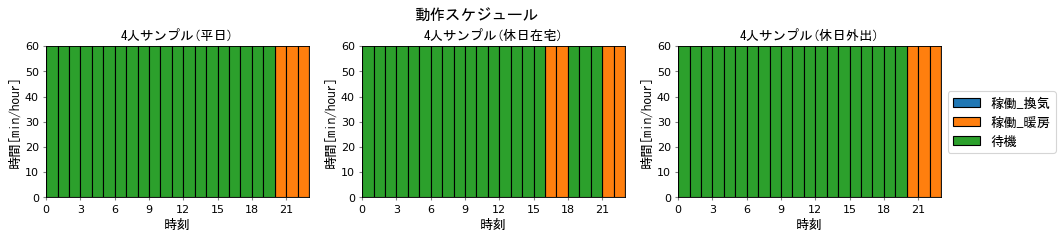

In [13]:
# 機器動作スケジュールの確認  
chart_title = '動作スケジュール'
schedule_name = ('4p_sample','4人サンプル' )
time_use_types = [ ('Weekdays','平日'), ('Holidays_st','休日在宅'), ('Holidays_go','休日外出') ]
app_status_types = [ ('opg_vent','稼働_換気'), ('opg_heat','稼働_暖房'), ('sby','待機') ]

y_value_sets = Schedule[schedule_name[0]] 


# サブプロットの作成
plt.figure(figsize=(12, 3), dpi=80)

# サブプロットのタイトル
plt.suptitle(chart_title, fontdict={'fontproperties':fp}, fontsize=14)

for i, time_use_type in enumerate(time_use_types):
    # サブプロットの指定
    ax = plt.subplot2grid((1, 3), (0, i))
    # グラフのタイル
    ax.set_title(schedule_name[1] +'(' + time_use_type[1] + ')' , fontdict={'fontproperties':fp})
    
    # x軸の値
    x_value = [k for k in range(24)]
    # y軸の値
    y_values = y_value_sets[time_use_type[0]]
    
    for j, app_status_type in enumerate(app_status_types):
        y_value = y_values[app_status_type[0]]
        if j == 0:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1])
            y_bottom = y_value
        else:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1], bottom=y_bottom)
            y_bottom = y_value       
   
    # x軸の設定
    ax.set_xlabel('時刻', fontdict={'fontproperties':fp})
    ax.set_xticks(np.arange(0, 25, 3), minor=False)
    ax.set_xbound(lower=0, upper=23)
    # y軸の設定
    ax.set_ylabel('時間[min/hour]', fontdict={'fontproperties':fp})
    ax.set_yticks(np.arange(0, 70, 10), minor=False)
    ax.set_ybound(lower=0, upper=60)
    # 目盛りの設定
    ax.grid(which='major', color='lightgray', alpha=0.5, linestyle='-')     
    ax.tick_params(direction='out', length=3, width=1, color='gray')
    ax.set_axisbelow(True) 

# 凡例
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True,  prop=fp)

# グラフの重なりを解消
plt.tight_layout()
plt.subplots_adjust(top=0.82)    
plt.show()

#### 16.5.3　暖房機能に関する居住者の使用行動

暖房機能に関する居住者の使用行動については、デフォルト設定がない。

ここでは、JIS C 9920-2：2009（浴室用電気乾燥機の設計標準使用期間を設定するための標準使用条件）の解説表1を基に、下表のように設定する。

<table style="border-collapse:collapse;">
    <caption>表 暖房機能の使用期間（参考）</caption>
    <thead style="background-color:lightgrey" >
        <tr>
            <th style="text-align:center; border:1px solid black;" >使用開始日</th>
            <th style="text-align:center; border:1px solid black;" >使用終了日</th>
        </tr>
    </thead>
    <tbody>    
            <td style="border:1px solid black; text-align:center;">11月16日</td>　<!--  0 -->
            <td style="border:1px solid black; text-align:center;">4月15日</td>　<!--  1 -->
    </tbody> 
</table>

In [14]:
UserBehavior = {
    'UserBehavior_sample' : {
        'heating_start_date': '11月16日',
        'heating_end_date'  : '4月15日'
    }
}

In [15]:
def get_heating_use(now_date, heating_start_date, heating_end_date):
    '''暖房機能の使用の有無を取得する'''
    # now_date：現在の日付
    # heating_end_date：暖房機能の使用開始日
    # heating_start_date：暖房機能の使用終了日
    
    now_d   = datetime.datetime.strptime(now_date, '%m月%d日')
    start_d = datetime.datetime.strptime(heating_start_date, '%m月%d日')
    end_d   = datetime.datetime.strptime(heating_end_date, '%m月%d日')
    
    if now_d >= end_d and now_d <= start_d:
        return False
    else:
        return True

### 付録1：サンプルコード

4人標準世帯の標準条件について、サンプルコードを示す。

In [16]:
def get_spec(app_type):
    '''機器仕様を取得する'''
    # app_type：機器タイプ
    
    # 機器仕様の取得
    try:
        spec = Spec[app_type]
    except:
        raise Exception('機器タイプの入力に不正があります。')     
    
    Prtd_vent = spec['Prtd_vent']
    Prtd_heat = spec['Prtd_heat']
    Prtd_sby  = spec['Prtd_sby']
    
    return Prtd_vent, Prtd_heat, Prtd_sby

Example:

In [17]:
ex_Prtd_vent, ex_Prtd_heat, ex_Prtd_sby = get_spec('BathroomHVA_sample')
ex_Prtd_vent, ex_Prtd_heat, ex_Prtd_sby

(21, 2200, 0.5)

In [18]:
def get_dt(time_use_type, time_of_day, schedule_name):
    '''機器動作スケジュールを取得する'''
    # time_use_type：['Weekdays', 'Holidays_st', 'Holidays_go']
    # time_of_day：時刻（0-23）
    # schedule_name：スケジュール名
     
    # スケジュールの取得
    try:
        schedule_set = Schedule[schedule_name][time_use_type]
    except:
        raise Exception('スケジュール名の入力に不正があります。')    
               
    # 動作状態のタイプ
    app_status_types = list(schedule_set)
    
    # 動作状態ごとの継続時間[s]の取得
    for i, app_status_type in enumerate(app_status_types):
        if app_status_type == 'opg_vent':
            dt_opg_ck = schedule_set[app_status_type][time_of_day]
        elif app_status_type == 'opg_heat':
            dt_opg_kp = schedule_set[app_status_type][time_of_day]
        elif app_status_type == 'sby':
            dt_sby = schedule_set[app_status_type][time_of_day]
        else:
            raise Exception
            
    # 時間超過の確認
    check_duration([dt_opg_ck, dt_opg_kp, dt_sby]) 
    
    return dt_opg_ck, dt_opg_kp, dt_sby

Example:

In [19]:
ex_dt_opg_vent, ex_dt_opg_heat, ex_dt_sby = get_dt('Weekdays', 21, '4p_sample')
ex_dt_opg_vent, ex_dt_opg_heat, ex_dt_sby

(0, 3600, 0)

In [20]:
def get_user_behavior(user_behavior_type):
    '''居住者の使用行動を取得する'''
    # user_behavior_type：居住者の使用行動タイプ
    
    # 居住者の使用行動の取得
    try:
        user_behavior = UserBehavior[user_behavior_type]
    except:
        raise Exception('居住者の使用行動タイプの入力に不正があります。')     
        
    heating_start_date = user_behavior['heating_start_date']
    heating_end_date = user_behavior['heating_end_date']
    
    return  heating_start_date, heating_end_date

Example:

In [21]:
ex_heating_start_date, ex_heating_end_date = get_user_behavior('UserBehavior_sample')
ex_heating_start_date, ex_heating_end_date

('11月16日', '4月15日')

In [22]:
ex_heating_use = get_heating_use('1月1日', ex_heating_start_date, ex_heating_end_date)
ex_heating_use 

True

In [23]:
def calc_EE_opg(Prtd_vent, Prtd_heat, dt_opg_vent, dt_opg_heat, heating_use):
    '''稼働時における消費電力量[Wh]を計算する'''
    # Prtd_vent：換気モードの定格消費電力[W]   
    # Prtd_heat：予備暖房モードの定格消費電力[W]  
    # dt_opg_vent：換気が機能することによる稼働時間の合計[s]
    # dt_opg_heat：暖房が機能することによる稼働時間の合計[s]
    # heating_use：暖房機能を使用するか否か[True：使用する、False：使用しない](Boolean型)
    
    # 換気が機能することによる稼働時の消費電力[W]
    p_opg_vent = P_opg_vent(Prtd_vent)
    # 換気が機能することによる稼働時の消費電力量[Wh]
    ee_opg_vent = EE_opg_vent(p_opg_vent, dt_opg_vent)
    
    # 暖房が機能することによる稼働時の消費電力[W]
    p_opg_heat = P_opg_heat (Prtd_heat, heating_use)
    # 暖房が機能することによる稼働時の消費電力量[Wh]
    ee_opg_heat = EE_opg_heat(p_opg_heat, dt_opg_heat)
    
    # 稼働時における消費電力量[Wh]
    ee_opg = EE_opg(ee_opg_vent, ee_opg_heat)
    
    return ee_opg

Example:

In [24]:
ex_EE_opg = calc_EE_opg(ex_Prtd_vent, ex_Prtd_heat, ex_dt_opg_vent, ex_dt_opg_heat, ex_heating_use )
ex_EE_opg

1834.8

In [25]:
def calc_EE_sby(Prtd_sby, dt_sby):
    '''稼働時における消費電力量[Wh]を計算する'''
    # dt_sby：待機時間の合計[s]
    # Prtd_sby：待機時の定格消費電力[W]      
    
    # 稼働時の消費電力[W]
    p_sby = P_sby (Prtd_sby)
       
    # '稼働時における消費電力量[Wh]
    ee_sby = EE_sby(p_sby, dt_sby)
    
    return ee_sby

Example:

In [26]:
ex_EE_sby = calc_EE_sby(ex_Prtd_sby, ex_dt_sby)
ex_EE_sby

0.0

In [27]:
def calc_EE_app(EE_opg, EE_sby):
    '''消費電力量[Wh]を計算する'''
    # EE_opg：稼働時における消費電力量[Wh]
    # EE_sby：待機時における消費電力量[Wh]
    
    return EE_app(EE_opg, EE_sby)

Example:

In [28]:
ex_EE_app = calc_EE_app(ex_EE_opg, ex_EE_sby)
ex_EE_app

1834.8

In [29]:
def calc_EE_BathroomHVA_verP4(time_use_type, time_of_day, app_type, schedule_name, user_behavior_type, now_date):
    '''浴室暖房・乾燥機の単位時間当たりの消費電力量を計算する（ver自立P4）'''
    # time_use_type：['Weekdays', 'Holidays_st', 'Holidays_go']
    # time_of_day：時刻（0-23） 
    # app_type：機器タイプ  
    # schedule_name：スケジュール名['4p_sample']
    # user_behavior_type：使用行動タイプ 
    # now_date：現在の日付
    
    # 機器動作スケジュール[s]を取得
    dt_opg_vent, dt_opg_heat, dt_sby = get_dt(time_use_type, time_of_day, schedule_name)
    
    # 機器仕様を取得
    Prtd_vent, Prtd_heat, Prtd_sby = get_spec(app_type)
    
    # 使用行動を取得
    heating_start_date, heating_end_date = get_user_behavior(user_behavior_type)
    
    # 暖房機能の使用の有無を取得
    heating_use = get_heating_use(now_date, heating_start_date, heating_end_date)
    
    # 稼働時における消費電力量[Wh]を計算
    EE_opg = calc_EE_opg(Prtd_vent, Prtd_heat, dt_opg_vent, dt_opg_heat, heating_use)
    
    # 待機時における消費電力量[Wh]を計算
    EE_sby = calc_EE_sby(Prtd_sby,dt_sby)
    
    # 消費電力量[Wh]を計算
    EE_app = calc_EE_app (EE_opg, EE_sby)
    
    return EE_app, EE_opg, EE_sby

Example:

In [30]:
ex_EE_BathroomHVA = calc_EE_BathroomHVA_verP4('Weekdays', 21, 'BathroomHVA_sample', '4p_sample', 'UserBehavior_sample', '1月1日')
ex_EE_BathroomHVA

(1834.8, 1834.8, 0.0)

### 付録2：サンプルコードによる時刻別消費電力量の計算例

4人標準世帯の標準条件に対して、サンプルコードにより平日、休日在宅、休日外出の時刻別消費電力量を計算した結果を示す。

In [31]:
# 消費電力量の計算
# 入力
time_use_type = [['Weekdays'], ['Holidays_st'], ['Holidays_go']]
time_of_day = [i for i in range(0, 24, 1)]
app_type = 'BathroomHVA_sample'
schedule_name = '4p_sample'
user_behavior_type = 'UserBehavior_sample'
now_date = '1月1日'

# 消費電力量の計算
ee_app, ee_opg, ee_sby = np.vectorize(calc_EE_BathroomHVA_verP4)(time_use_type, time_of_day, app_type, schedule_name, user_behavior_type, now_date)

# 消費電力量の計算結果
EE_Results= {
    'Weekdays' : {
        'opg' : ee_opg[0],
        'sby' : ee_sby[0]
    },
    'Holidays_st' : {
        'opg' : ee_opg[1],
        'sby' : ee_sby[1]
    },
    'Holidays_go' : {
        'opg' : ee_opg[2],
        'sby' : ee_sby[2]
    }
}

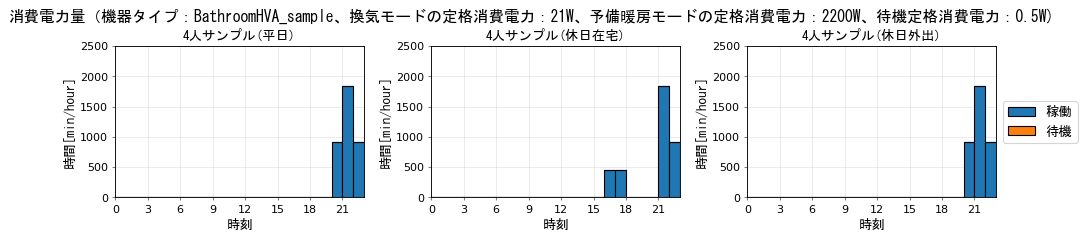

In [32]:
# 消費電力量の計算結果のグラフ 
chart_title = '消費電力量（' \
                + '機器タイプ：' + app_type + '、' \
                + '換気モードの定格消費電力：' + str(Spec[app_type]['Prtd_vent']) + 'W、' \
                + '予備暖房モードの定格消費電力：' + str(Spec[app_type]['Prtd_heat']) + 'W、' \
                + '待機定格消費電力：' + str(Spec[app_type]['Prtd_sby'])+ 'W' \
                + ')'
schedule_name = ('4p_sample','4人サンプル' )
time_use_types = [ ('Weekdays','平日'), ('Holidays_st','休日在宅'), ('Holidays_go','休日外出') ]
app_status_types = [ ('opg','稼働'), ('sby','待機') ]

y_value_sets = EE_Results


# サブプロットの作成
plt.figure(figsize=(12, 3), dpi=80)

# サブプロットのタイトル
plt.suptitle(chart_title, fontdict={'fontproperties':fp}, fontsize=14)

for i, time_use_type in enumerate(time_use_types):
    # サブプロットの指定
    ax = plt.subplot2grid((1, 3), (0, i))
    # グラフのタイル
    ax.set_title(schedule_name[1] +'(' + time_use_type[1] + ')' , fontdict={'fontproperties':fp})
    
    # x軸の値
    x_value = [k for k in range(24)]
    # y軸の値
    y_values = y_value_sets[time_use_type[0]]
    
    for j, app_status_type in enumerate(app_status_types):
        y_value = y_values[app_status_type[0]]
        if j == 0:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1])
            y_bottom = y_value
        else:
            ax.bar(x_value, y_value, align='edge', width=1.0, edgecolor='black', label=app_status_type[1], bottom=y_bottom)
            y_bottom = y_value       
   
    # x軸の設定
    ax.set_xlabel('時刻', fontdict={'fontproperties':fp})
    ax.set_xticks(np.arange(0, 25, 3), minor=False)
    ax.set_xbound(lower=0, upper=23)
    # y軸の設定
    ax.set_ylabel('時間[min/hour]', fontdict={'fontproperties':fp})
    ax.set_yticks(np.arange(0, 3000, 500), minor=False)
    ax.set_ybound(lower=0, upper=2500)
    # 目盛りの設定
    ax.grid(which='major', color='lightgray', alpha=0.5, linestyle='-')     
    ax.tick_params(direction='out', length=3, width=1, color='gray')
    ax.set_axisbelow(True) 

# 凡例
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0.5, frameon=True,  prop=fp)

# グラフの重なりを解消
plt.tight_layout()
plt.subplots_adjust(top=0.82)    
plt.show()

### 付録3：サンプルコードによる年間消費電力量の計算例

4人標準世帯の標準条件に対して、サンプルコードにより年間消費電力量を計算した結果を示す。

In [33]:
def calc_annual_EE_app(app_type, schedule_name, user_behavior_type):
    '''年間消費電力量[Wh/year]を計算する'''
    # app_type：機器タイプ  
    # schedule_name：スケジュール名  
    # user_behavior_type：使用行動タイプ
       
    def calc_daily_EE_app(schedule, app_type, schedule_name, user_behavior_type, now_date):
        '''1日あたりの消費電力量[Wh/day]を計算する'''
        hourly_EE_app = [ calc_EE_BathroomHVA_verP4(schedule, t, app_type, schedule_name, user_behavior_type, now_date)[1] for t in range(0, 24, 1) ]
        return sum( hourly_EE_app )
    
    daily_EE_app = [ calc_daily_EE_app(calendar[1], app_type, schedule_name, user_behavior_type, calendar[0]) for calendar in get_calendar_rev() ]
    return sum( daily_EE_app )

In [34]:
# 年間消費電力量[kWh/year]
ex_annual_EE_app = calc_annual_EE_app('BathroomHVA_sample', '4p_sample', 'UserBehavior_sample')
print('年間消費電力量：' + str(ex_annual_EE_app/1000) + ' kWh/年')

年間消費電力量：546.7703999999985 kWh/年
